In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishjangra27/doodle-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.72G/4.72G [00:52<00:00, 97.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ashishjangra27/doodle-dataset/versions/1


In [3]:
!ls /root/.cache/kagglehub/datasets/ashishjangra27/doodle-dataset/versions/1/doodle/car/

4504232239562752.png  5286982089441280.png  6025030544654336.png
4504772059070464.png  5287369227894784.png  6025494032023552.png
4505262528397312.png  5288268516032512.png  6025775973138432.png
4505405549969408.png  5289740347637760.png  6026381479641088.png
4506885484969984.png  5291666036490240.png  6026393647316992.png
4510123101782016.png  5293722906394624.png  6026423288463360.png
4512172270944256.png  5294829028245504.png  6027048189427712.png
4512623208955904.png  5295519041585152.png  6027412238237696.png
4513167377956864.png  5296413250420736.png  6028204944916480.png
4513222004572160.png  5297405639524352.png  6030585027887104.png
4513932016353280.png  5298619102003200.png  6030756256153600.png
4515441680580608.png  5299692797689856.png  6030984644395008.png
4516576390807552.png  5299991964811264.png  6031240685682688.png
4517910401777664.png  5301331495485440.png  6031607704059904.png
4519102758518784.png  5301394758172672.png  6031990404939776.png
4519140339482624.png  530

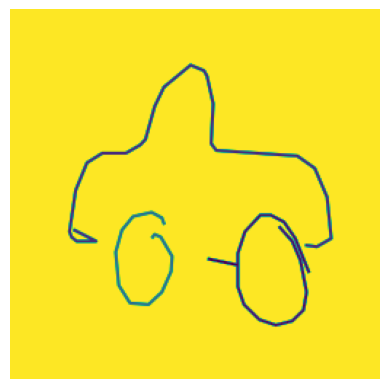

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/root/.cache/kagglehub/datasets/ashishjangra27/doodle-dataset/versions/1/doodle/car/5215743434031104.png")
plt.imshow(img)
plt.axis('off')  # optional: hides axis
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os

In [ ]:
DATA_DIR = '/root/.cache/kagglehub/datasets/ashishjangra27/doodle-dataset/versions/1/doodle/'
BATCH_SIZE = 64
EPOCHS = 10
NUM_CLASSES = 340
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
train_dataset = datasets.ImageFolder(root=DATA_DIR, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
class DoodleNet(nn.Module):
    def __init__(self):
        super(DoodleNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(), nn.BatchNorm2d(32), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.BatchNorm2d(64), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.BatchNorm2d(128), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 512), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(512, NUM_CLASSES)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [ ]:
model = DoodleNet().to(DEVICE)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(EPOCHS):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {running_loss/len(train_loader):.4f} - Accuracy: {100*correct/total:.2f}%")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
# Configuration
DATA_DIR = '/root/.cache/kagglehub/datasets/ashishjangra27/doodle-dataset/versions/1/doodle/'
BATCH_SIZE = 32
IMG_SIZE = 32
NUM_CLASSES = 340
EPOCHS = 10

# Data Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 918000 images belonging to 340 classes.
Found 102000 images belonging to 340 classes.


In [ ]:
# Model Definition
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# Save model
model.save('doodlenet_tf.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 4902/14344 ━━━━━━━━━━━━━━━━━━━━ 15:59 102ms/step - accuracy: 0.0485 - loss: 5.1295

KeyboardInterrupt: 

In [28]:
import os
import shutil
from tqdm import tqdm

SOURCE_DIR = '/root/.cache/kagglehub/datasets/ashishjangra27/doodle-dataset/versions/1/doodle/'
DEST_DIR = "subset_100_classes"  # Output folder
MAX_CLASSES = 50
IMAGES_PER_CLASS = 3000

os.makedirs(DEST_DIR, exist_ok=True)
class_folders = sorted(os.listdir(SOURCE_DIR))[:MAX_CLASSES]

for cls in tqdm(class_folders, desc="Copying classes"):
    src_cls_path = os.path.join(SOURCE_DIR, cls)
    dst_cls_path = os.path.join(DEST_DIR, cls)
    os.makedirs(dst_cls_path, exist_ok=True)

    images = sorted(os.listdir(src_cls_path))[:IMAGES_PER_CLASS]
    for img in images:
        shutil.copy(os.path.join(src_cls_path, img), os.path.join(dst_cls_path, img))

print("Subset prepared!")

Copying classes: 100%|██████████| 50/50 [00:26<00:00,  1.89it/s]

Subset prepared!


In [29]:
class_names = os.listdir(DEST_DIR)
class_names

['ambulance',
 'belt',
 'bear',
 'bulldozer',
 'blueberry',
 'airplane',
 'bread',
 'bat',
 'apple',
 'bandage',
 'beach',
 'asparagus',
 'blackberry',
 'backpack',
 'baseball',
 'book',
 'arm',
 'alarm clock',
 'broccoli',
 'beard',
 'boomerang',
 'birthday cake',
 'bird',
 'bottlecap',
 'The Eiffel Tower',
 'bed',
 'The Great Wall of China',
 'The Mona Lisa',
 'bowtie',
 'bus',
 'binoculars',
 'bicycle',
 'axe',
 'animal migration',
 'bench',
 'bathtub',
 'baseball bat',
 'bucket',
 'bracelet',
 'ant',
 'angel',
 'broom',
 'bee',
 'basket',
 'bridge',
 'anvil',
 'barn',
 'banana',
 'brain',
 'basketball']

In [10]:
!rm -rf ./subset_100_classes

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import os

In [40]:
tf.__version__

'2.18.0'

In [31]:

# === Config ===
DATA_DIR = 'subset_100_classes'
IMG_SIZE = 28
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = len(os.listdir(DATA_DIR))

# === Data ===
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='validation',
    shuffle=False
)

Found 135000 images belonging to 50 classes.
Found 15000 images belonging to 50 classes.


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4219/4219 ━━━━━━━━━━━━━━━━━━━━ 118s 26ms/step - accuracy: 0.0751 - loss: 4.4804 - val_accuracy: 0.2955 - val_loss: 2.6144
Epoch 2/20
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 102s 24ms/step - accuracy: 0.2255 - loss: 3.0359 - val_accuracy: 0.3915 - val_loss: 2.2211
Epoch 3/20
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 99s 23ms/step - accuracy: 0.3116 - loss: 2.5725 - val_accuracy: 0.4436 - val_loss: 2.0064
Epoch 4/20
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 102s 24ms/step - accuracy: 0.3717 - loss: 2.3192 - val_accuracy: 0.4550 - val_loss: 1.9513
Epoch 5/20
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 97s 23ms/step - accuracy: 0.4051 - loss: 2.1571 - val_accuracy: 0.5134 - val_loss: 1.7374
Epoch 6/20
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 98s 23ms/step - accuracy: 0.4316 - loss: 2.0600 - val_accuracy: 0.4350 - val_loss: 2.1512
Epoch 7/20
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 96s 23ms/step - accuracy: 0.4516 - loss: 1.9851 - val_accuracy: 0.4653 - val_loss: 1.9234
Epoch 8/20
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 99s 23ms/step - accuracy: 0.4693 - loss: 1

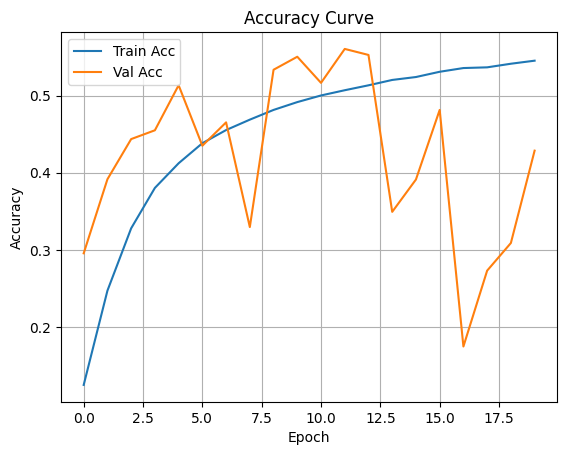

In [32]:
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(NUM_CLASSES, activation='softmax')
])



optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

model.save('doodle_340_model.h5')

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


Epoch 1/10
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 95s 22ms/step - accuracy: 0.5735 - loss: 1.5106 - val_accuracy: 0.6068 - val_loss: 1.3872
Epoch 2/10
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 94s 22ms/step - accuracy: 0.5765 - loss: 1.4941 - val_accuracy: 0.4198 - val_loss: 2.2707
Epoch 3/10
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 142s 22ms/step - accuracy: 0.5779 - loss: 1.4883 - val_accuracy: 0.5811 - val_loss: 1.4741
Epoch 4/10
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 95s 22ms/step - accuracy: 0.5777 - loss: 1.4872 - val_accuracy: 0.4485 - val_loss: 2.1182
Epoch 5/10
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 96s 23ms/step - accuracy: 0.5793 - loss: 1.4782 - val_accuracy: 0.3895 - val_loss: 2.2297
Epoch 6/10
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 96s 23ms/step - accuracy: 0.5809 - loss: 1.4775 - val_accuracy: 0.1067 - val_loss: 4.2589
Epoch 7/10
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 94s 22ms/step - accuracy: 0.5840 - loss: 1.4672 - val_accuracy: 0.5849 - val_loss: 1.4816
Epoch 8/10
4219/4219 ━━━━━━━━━━━━━━━━━━━━ 95s 22ms/step - accuracy: 0.5846 

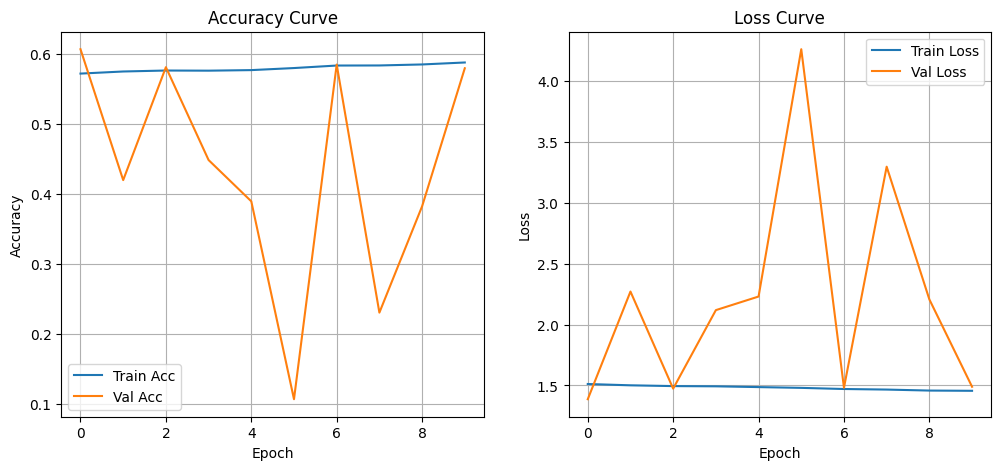

In [36]:
model.load_weights('doodle_340_model.h5')

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

# === Save Model ===
model.save('doodle_340_model.h5')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

In [25]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_doodle(model_path, img_path, class_names):
  """Predicts the class of a doodle image.

  Args:
    model_path: Path to the saved model (.h5 file).
    img_path: Path to the image to predict.
    class_names: A list of class names corresponding to the model's output.

  Returns:
    The predicted class label and confidence score.
  """

  # Load the model
  model = tf.keras.models.load_model(model_path)

  # Preprocess the image
  img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array / 255.0  # Normalize

  # Make the prediction
  prediction = model.predict(img_array)
  predicted_class_index = np.argmax(prediction)
  confidence = prediction[0][predicted_class_index]

  # Get the class label
  predicted_class_label = class_names[predicted_class_index]

  return predicted_class_label, confidence

In [38]:
predict_doodle("./doodle_340_model.h5", "./image.png", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


('beach', np.float32(0.45099777))